# Data Loading and Exploration

In this section, we load the dataset and perform basic exploration
to understand its structure and contents.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_performance.csv")

# Display first rows
df.head()

,study_hours,attendance_rate,assignments_completed,midterm_score,project_score,previous_gpa,participation_score,extra_classes,stress_level,sleep_hours,final_result
0,5,85,8,72,75,3.1,7,1,6,7,Pass
1,2,60,4,50,55,2.2,5,0,8,5,Fail
2,7,92,9,80,85,3.5,8,1,5,7,Pass
3,1,55,3,40,48,1.9,4,0,9,4,Fail
4,6,88,8,78,80,3.3,7,1,5,6,Pass


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours            15 non-null     int64  
 1   attendance_rate        15 non-null     int64  
 2   assignments_completed  15 non-null     int64  
 3   midterm_score          15 non-null     int64  
 4   project_score          15 non-null     int64  
 5   previous_gpa           15 non-null     float64
 6   participation_score    15 non-null     int64  
 7   extra_classes          15 non-null     int64  
 8   stress_level           15 non-null     int64  
 9   sleep_hours            15 non-null     int64  
 10  final_result           15 non-null     str    
dtypes: float64(1), int64(9), str(1)
memory usage: 1.5 KB


In [17]:
df.describe()

,study_hours,attendance_rate,assignments_completed,midterm_score,project_score,previous_gpa,participation_score,extra_classes,stress_level,sleep_hours
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.600000,75.933333,6.533333,66.466667,69.333333,2.866667,6.466667,0.533333,6.066667,6.000000
std,2.557901,16.615254,2.587516,18.239935,17.165858,0.715808,1.807392,0.516398,1.907379,1.195229
min,1.000000,50.000000,2.000000,35.000000,40.000000,1.800000,3.000000,0.000000,3.000000,4.000000
25%,2.500000,61.000000,4.500000,52.500000,56.500000,2.250000,5.000000,0.000000,4.500000,5.000000
50%,5.000000,78.000000,7.000000,70.000000,72.000000,3.000000,7.000000,1.000000,6.000000,6.000000
75%,6.500000,91.000000,8.500000,81.000000,84.500000,3.450000,8.000000,1.000000,7.500000,7.000000
max,9.000000,98.000000,10.000000,92.000000,94.000000,3.900000,9.000000,1.000000,9.000000,8.000000


# Exploratory Data Analysis (EDA)

We analyze distributions, correlations, and class imbalance.

In [18]:
# Check class distribution
df['final_result'].value_counts()

final_result
Pass    9
Fail    6
Name: count, dtype: int64

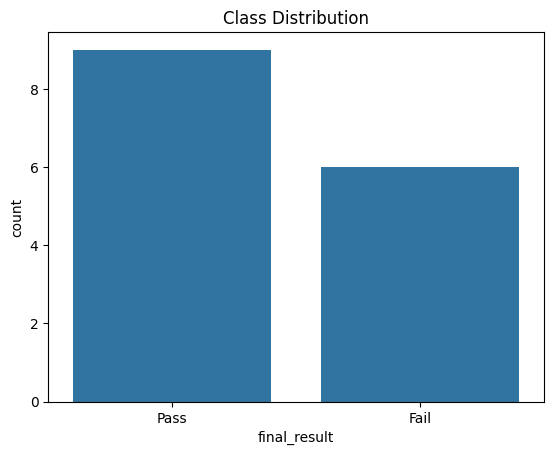

In [19]:
sns.countplot(x='final_result', data=df)
plt.title("Class Distribution")
plt.show()

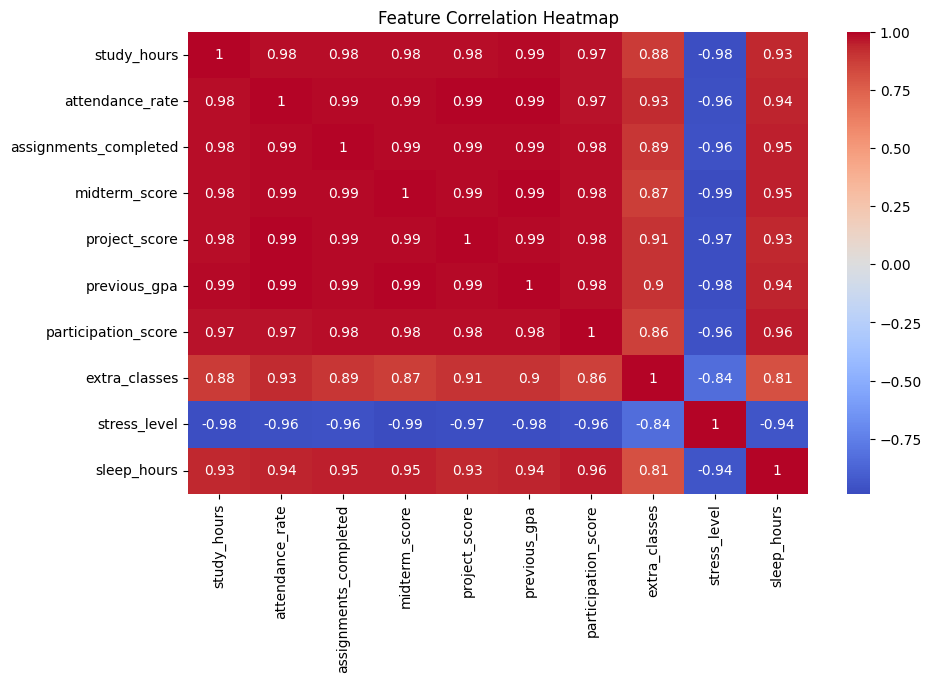

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Engineering

Convert categorical target into numeric form.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['final_result'] = le.fit_transform(df['final_result'])  # Pass=1, Fail=0

X = df.drop("final_result", axis=1)
y = df["final_result"]

# Train-Test Split

Split dataset into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling

KNN is distance-based, so scaling is necessary.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling Class Imbalance

We use SMOTE to balance minority class.

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

# Hyperparameter Tuning using GridSearchCV

We tune KNN parameters using stratified 5-fold cross-validation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine'],
    'p': [1, 2, 3]
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5)

grid = GridSearchCV(
    knn,
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:927: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 916, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 317, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 409, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

In [ ]:
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


# Decision Boundary Visualization

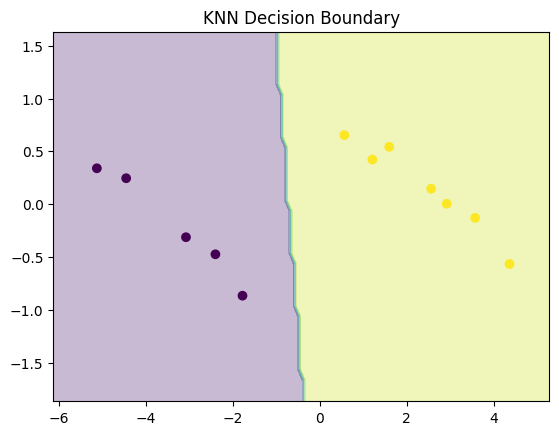

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train)
plt.title("KNN Decision Boundary")
plt.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = best_knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Accuracy: 0.6666666666666666
